In [ ]:
#Data downloaded from https://www.kaggle.com/c/decoding-the-human-brain/data

In [18]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [3]:
X=loadmat('C:/Users/koester_lab/Documents/Maria/EEG/data/train_subject01.mat')['X']
y=loadmat('C:/Users/koester_lab/Documents/Maria/EEG/data/train_subject01.mat')['y']

In [4]:
X_fft=np.fft.fft(X)

In [10]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X_fft,y,test_size=0.33, random_state=42)

train_y=train_y.flatten()
test_y=test_y.flatten()
scramble_X_train=train_X[train_y==0]
face_X_train=train_X[train_y==1]

In [57]:
from sklearn.decomposition import PCA


pca_scramble=PCA(n_components=100)
pcs_scramble=pca_scramble.fit_transform(np.mean(scramble_X_train[:,:,:],axis=0).T.real)
print(pca_scramble.explained_variance_ratio_)
print(np.sum(pca_scramble.explained_variance_ratio_))

[3.73272699e-01 2.88713603e-01 1.36681333e-01 4.96329570e-02
 3.41021725e-02 1.52839918e-02 1.23900077e-02 8.98109977e-03
 7.46813105e-03 5.14333210e-03 4.96114136e-03 3.85284453e-03
 3.39656174e-03 2.64311337e-03 2.41497313e-03 2.10717419e-03
 1.99470818e-03 1.83823381e-03 1.79924027e-03 1.56516522e-03
 1.44293206e-03 1.34592424e-03 1.18621981e-03 1.14659148e-03
 1.08236949e-03 1.06475446e-03 9.68063867e-04 9.50354862e-04
 8.68462982e-04 8.44629688e-04 8.34830433e-04 7.97956976e-04
 7.91686818e-04 7.81016719e-04 7.24832876e-04 7.18968708e-04
 6.88919720e-04 6.75086587e-04 6.56486442e-04 6.27586195e-04
 6.09350419e-04 5.94460592e-04 5.77605962e-04 5.67469444e-04
 5.46605402e-04 5.25190439e-04 5.09836024e-04 4.92860987e-04
 4.83451302e-04 4.76258788e-04 4.70226546e-04 4.58754094e-04
 4.48291121e-04 4.43536400e-04 4.31430988e-04 4.09023794e-04
 4.04797337e-04 3.92686794e-04 3.87766240e-04 3.75077544e-04
 3.72657971e-04 3.67745241e-04 3.59332349e-04 3.44870221e-04
 3.38928998e-04 3.349209

In [54]:

pca_face=PCA(n_components=100)
pcs_face=pca_face.fit_transform(np.mean(face_X_train[:,:,:],axis=0).T.real)
print(pca_face.explained_variance_ratio_)
print(np.sum(pca_face.explained_variance_ratio_))

[4.78737498e-01 1.69462019e-01 8.05902317e-02 6.38765763e-02
 3.35837713e-02 1.86805092e-02 1.59262713e-02 1.47333153e-02
 9.79744905e-03 8.41412244e-03 7.30841321e-03 5.48126758e-03
 4.99935215e-03 4.68747341e-03 4.48223804e-03 3.92033606e-03
 3.75053407e-03 2.96689503e-03 2.70008602e-03 2.51787364e-03
 2.01024475e-03 1.98266737e-03 1.94186910e-03 1.79459582e-03
 1.65243033e-03 1.58359286e-03 1.46120040e-03 1.42957967e-03
 1.31799193e-03 1.28042208e-03 1.22036567e-03 1.20079068e-03
 1.18946212e-03 1.13030034e-03 1.09957493e-03 1.06644756e-03
 1.04511689e-03 1.00991685e-03 9.68318711e-04 9.23471373e-04
 8.96561359e-04 8.69291737e-04 8.50356476e-04 8.41515852e-04
 8.14510368e-04 8.06163557e-04 7.70882530e-04 7.65101577e-04
 7.51158973e-04 7.20716300e-04 7.05756531e-04 6.90963871e-04
 6.81878832e-04 6.67695913e-04 6.52239435e-04 6.45737549e-04
 6.38981473e-04 6.24732647e-04 5.89770399e-04 5.83050706e-04
 5.73230601e-04 5.41890670e-04 5.39704760e-04 5.21280272e-04
 5.18683214e-04 5.170839

In [16]:
print(pcs_face.shape)

(375, 10)


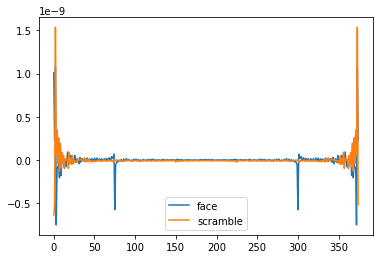

In [55]:
plt.plot(pcs_face[:,0],label='face')
plt.plot(pcs_scramble[:,0],label='scramble')
plt.legend()

In [115]:
'''
for j in range(0,100):
    print(j)
    plt.plot(pcs_face[:,j],label='face')
    plt.plot(pcs_scramble[:,j],label='scramble')
    plt.legend()
    plt.show()
    print(np.corrcoef(pcs_face[:,j],pcs_scramble[:,j])[0,1])
'''

"\nfor j in range(0,100):\n    print(j)\n    plt.plot(pcs_face[:,j],label='face')\n    plt.plot(pcs_scramble[:,j],label='scramble')\n    plt.legend()\n    plt.show()\n    print(np.corrcoef(pcs_face[:,j],pcs_scramble[:,j])[0,1])\n"

In [64]:
print(pcs_scramble.shape)

(375, 100)


In [67]:
face_t=pca_face.transform(test_X[j,:,:].T.real)
print(face_t.shape)

(375, 100)


In [116]:
transformed_ts_test=[]
acc_lst=[]
for j in range(test_X.shape[0]):
    face_t=pca_face.transform(test_X[j,:,:].T.real)
    face_dot=np.sum(np.diag(np.dot(face_t.T,pcs_face)))
    scramble_t=pca_scramble.transform(test_X[j,:,:].T.real)
    scramble_dot=np.sum(np.diag(np.dot(scramble_t.T,pcs_scramble)))
    comp=[scramble_dot,face_dot]
    ind=np.argmax(comp)
    '''
    for i in range(0,10):
        print(i)
        print('label:',test_y[j])
        plt.plot(face_t[:,i],label='face test vector')
        plt.plot(pcs_face[:,i],label='face protototype')
        plt.legend()
        plt.show()
        print('label: ', test_y[j])
        plt.plot(scramble_t[:,i],label='scramble test vector')
        plt.plot(pcs_scramble[:,i],label='scramble prototype')
        plt.legend()
        plt.show()
    '''

In [51]:
print(acc_lst)

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [46]:
print(test_y)

[1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1
 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 1 1]


In [52]:
print(np.sum(acc_lst==test_y)/test_y.shape[0])

0.5279187817258884


In [ ]:
transformed_ts_test=[]
acc_lst=[]
for j in range(test_X.shape[0]):
    face_t=pca_face.transform(test_X[j,:,:].T.real)
    face_dot=np.sum(np.diag(np.dot(face_t.T,pcs_face)))
    scramble_t=pca_scramble.transform(test_X[j,:,:].T.real)
    scramble_dot=np.sum(np.diag(np.dot(scramble_t.T,pcs_scramble)))
    comp=[scramble_dot,face_dot]
    ind=np.argmax(comp)
    acc_lst.append(ind)

In [114]:
transformed_ts_test=[]
acc_lst=[]
for j in range(test_X.shape[0]):
    face_t=pca_face.transform(test_X[j,:,:].T.real)
    face_norm=[]
    for z in range(0,100):
        face_peaks=list(np.sort(np.argsort(np.abs(face_t[:,z]))[-10:]))#.sort()
        #print(face_peaks)
        face_pcs_peaks=list(np.sort(np.argsort(np.abs(pcs_face[:,z]))[-10:]))
        #print(face_pcs_peaks)
        h=len([1 for x in face_pcs_peaks if x in face_peaks])
    face_dist=np.sum(h)
    scramble_t=pca_scramble.transform(test_X[j,:,:].T.real)
    scramble_norm=[]
    for z in range(0,100):
        scramble_peaks=list(np.sort(np.argsort(scramble_t[:,z])[-10:]))
        scramble_pcs_peaks=list(np.sort(np.argsort(np.abs(pcs_scramble[:,z]))[-10:]))
        h=len([1 for x in scramble_pcs_peaks if x in scramble_peaks])
    face_dist=np.sum(h)
    comp=[scramble_dist,face_dist]
    ind=np.argmax(comp)
    acc_lst.append(ind)

In [111]:
print(np.sum(acc_lst==test_y)/test_y.shape[0])

0.4619289340101523
